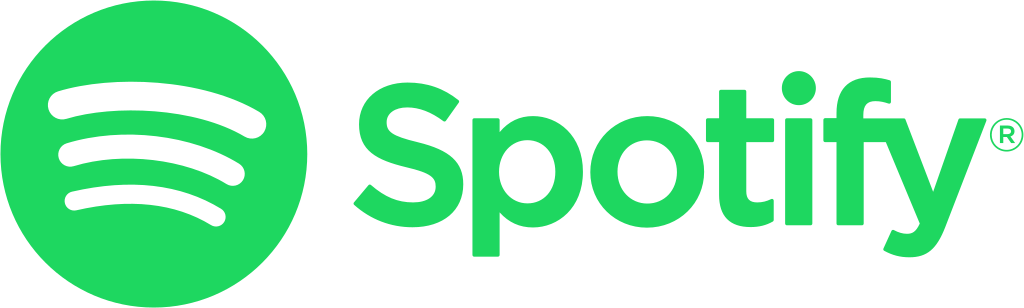

In [1]:
# Libraries used
import joblib
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [2]:
# For clustering:
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### **CLUSTERING:**

In [12]:
# Read the CSV file
music_df = pd.read_csv("./data/music_df.csv")
music_df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    country      artist      album  \
0             0             0         0.0      Aruba  FloyyMenor  Gata Only   
1             1             1        77.0     Angola  FloyyMenor  Gata Only   
2             2             2       152.0    Andorra  FloyyMenor  Gata Only   
3             3             3       200.0  Argentina  FloyyMenor  Gata Only   
4             4             4       251.0    Armenia  FloyyMenor  Gata Only   

   song_name release_date  duration_ms  popularity  ... key  loudness  mode  \
0  Gata Only   2024-02-02     222000.0        94.0  ...   8    -8.472     0   
1  Gata Only   2024-02-02     222000.0        94.0  ...   8    -8.472     0   
2  Gata Only   2024-02-02     222000.0        94.0  ...   8    -8.472     0   
3  Gata Only   2024-02-02     222000.0        94.0  ...   8    -8.472     0   
4  Gata Only   2024-02-02     222000.0        94.0  ...   8    -8.472     0   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0       0.0509         0.446          0.000024    0.0899    0.669  99.986   
1       0.0509         0.446          0.000024    0.0899    0.669  99.986   
2       0.0509         0.446          0.000024    0.0899    0.669  99.986   
3       0.0509         0.446          0.000024    0.0899    0.669  99.986   
4       0.0509         0.446          0.000024    0.0899    0.669  99.986   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4  

[5 rows x 23 columns]

In [16]:
music_df.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], inplace=True)


In [17]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           5862 non-null   object 
 1   artist            5862 non-null   object 
 2   album             5862 non-null   object 
 3   song_name         5862 non-null   object 
 4   release_date      5862 non-null   object 
 5   duration_ms       5862 non-null   float64
 6   popularity        5862 non-null   float64
 7   track_id          5862 non-null   object 
 8   danceability      5862 non-null   float64
 9   energy            5862 non-null   float64
 10  key               5862 non-null   int64  
 11  loudness          5862 non-null   float64
 12  mode              5862 non-null   int64  
 13  speechiness       5862 non-null   float64
 14  acousticness      5862 non-null   float64
 15  instrumentalness  5862 non-null   float64
 16  liveness          5862 non-null   float64


In [18]:
music_df.describe()

duration_ms   popularity  danceability       energy          key  \
count  5.862000e+03  5862.000000   5862.000000  5862.000000  5862.000000   
mean   1.989141e+05    68.453429      0.678990     0.649914     5.491129   
std    6.739988e+04    22.631001      0.136999     0.166798     3.528011   
min    3.926600e+04     0.000000      0.154000     0.005620     0.000000   
25%    1.607925e+05    57.000000      0.584000     0.551000     2.000000   
50%    1.883715e+05    74.000000      0.696000     0.668000     6.000000   
75%    2.253575e+05    86.000000      0.785000     0.773000     9.000000   
max    1.848000e+06   100.000000      0.980000     0.993000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  5862.000000  5862.000000  5862.000000   5862.000000       5862.000000   
mean     -6.705885     0.557830     0.098789      0.272224          0.028453   
std       2.990850     0.496687     0.090543      0.252697          0.126770   
min     -30.663000     0.000000     0.023100      0.000003          0.000000   
25%      -8.055750     0.000000     0.042125      0.065700          0.000000   
50%      -6.122500     1.000000     0.060600      0.184000          0.000002   
75%      -4.772000     1.000000     0.120000      0.434000          0.000213   
max       3.233000     1.000000     0.906000      0.996000          0.976000   

          liveness      valence        tempo  time_signature  
count  5862.000000  5862.000000  5862.000000     5862.000000  
mean      0.169509     0.557460   121.700186        3.897305  
std       0.125251     0.234068    28.465375        0.434437  
min       0.015400     0.037800    36.331000        1.000000  
25%       0.094400     0.370000    99.976000        4.000000  
50%       0.119000     0.563000   117.821000        4.000000  
75%       0.200000     0.747000   141.904000        4.000000  
max       0.991000     0.981000   214.034000        5.000000

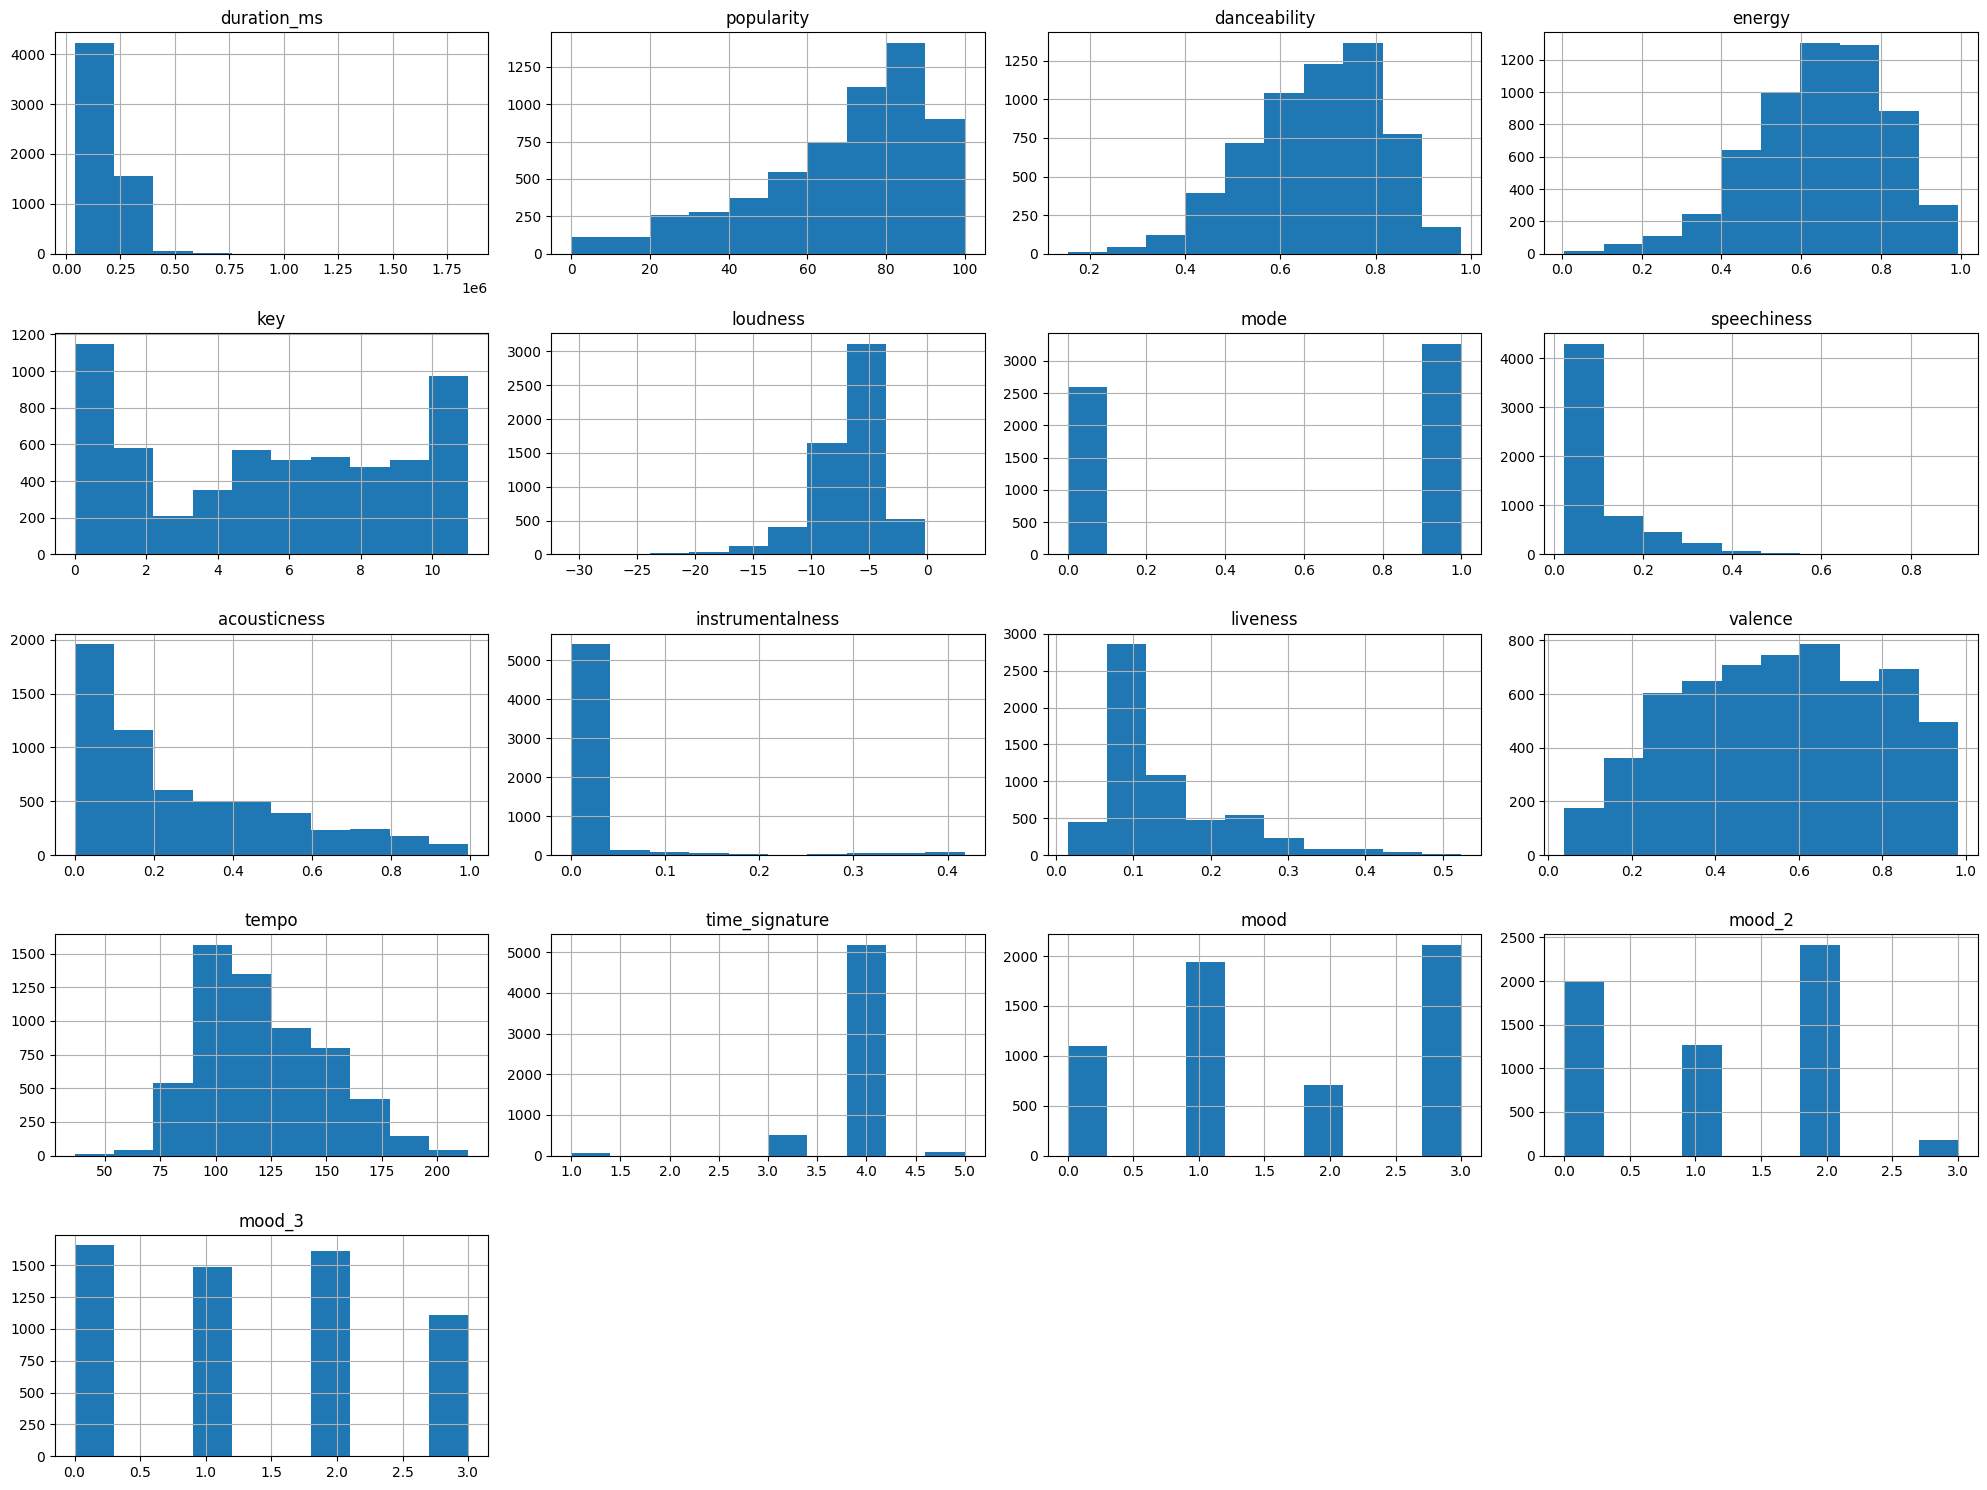

In [39]:
# Plot histograms for each column
music_df.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [24]:
# List of features for clustering
col_features = ['danceability',
                'acousticness',
                'energy',
                'instrumentalness',
                'liveness',
                'valence',
                'loudness',
                'speechiness',
                'tempo']

# List of top features for clustering
col_features_2 = ['instrumentalness',
                  'energy', 
                  'acousticness', 
                  'loudness', 
                  'valence']

In [ ]:
# Exclude non-numeric columns
numeric_columns = music_df.select_dtypes(include=['int64', 'float64']).columns

# Separate the features
X = music_df[numeric_columns]

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold=0.1)

# Apply the selector to your data
X_selected = selector.fit_transform(X)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected features:", selected_features)


#### Option 1:

In [25]:
# log1p for liveness and instrumentalness
music_df['instrumentalness'] = np.log1p(music_df['instrumentalness'])
music_df['liveness'] = np.log1p(music_df['liveness'])

# Normalize features to the range [0, 1]
X = MinMaxScaler().fit_transform(music_df[col_features])

# Perform clustering with KMeans
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                max_iter=1000,
                random_state=42).fit(X)

# Add cluster labels to the DataFrame
music_df['mood'] = kmeans.labels_

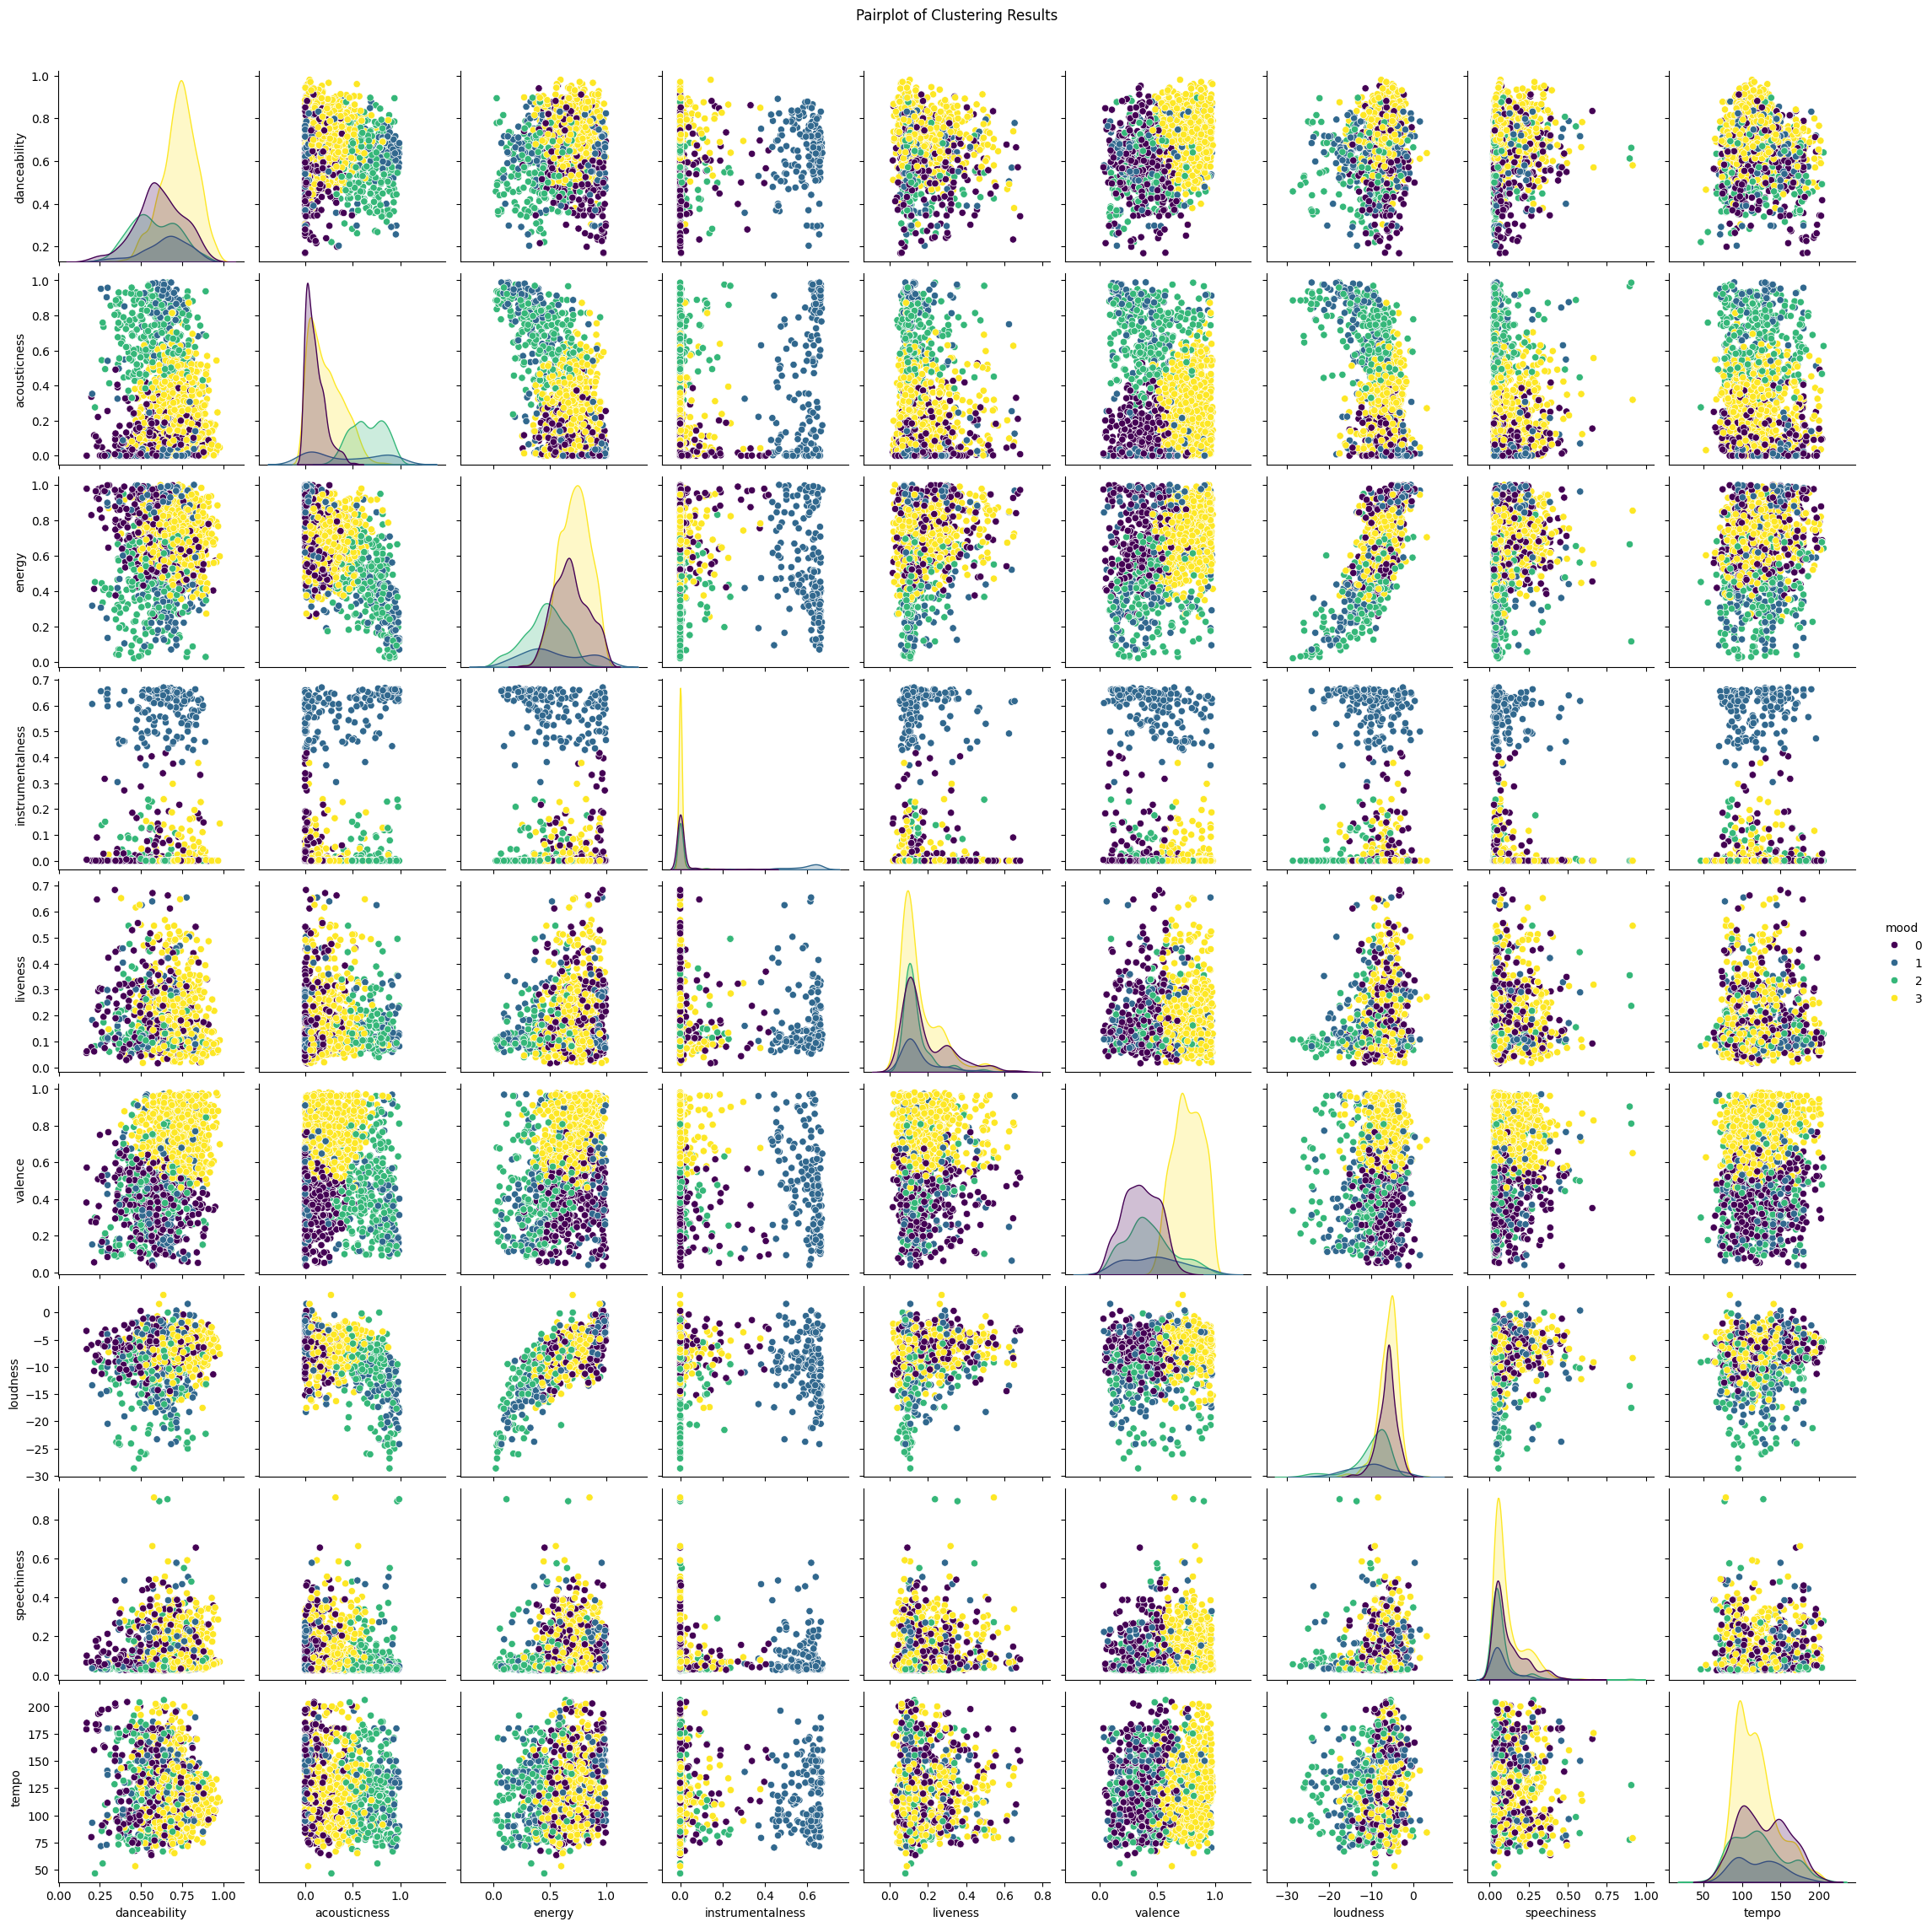

In [11]:
# Pairplot para visualizar todas las combinaciones de características
sns.pairplot(music_df, vars=col_features, hue='mood', palette='viridis')
plt.suptitle('Pairplot of Clustering Results', y=1.02)
plt.show()

#### Option 2:

In [26]:
# log1p for instrumentalness
music_df['instrumentalness'] = np.log1p(music_df['instrumentalness'])

# Normalize features to the range [0, 1]
X = MinMaxScaler().fit_transform(music_df[col_features_2])

# Perform clustering with KMeans
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                max_iter=1000,
                random_state=42).fit(X)

# Add cluster labels to the DataFrame
music_df['mood_2'] = kmeans.labels_

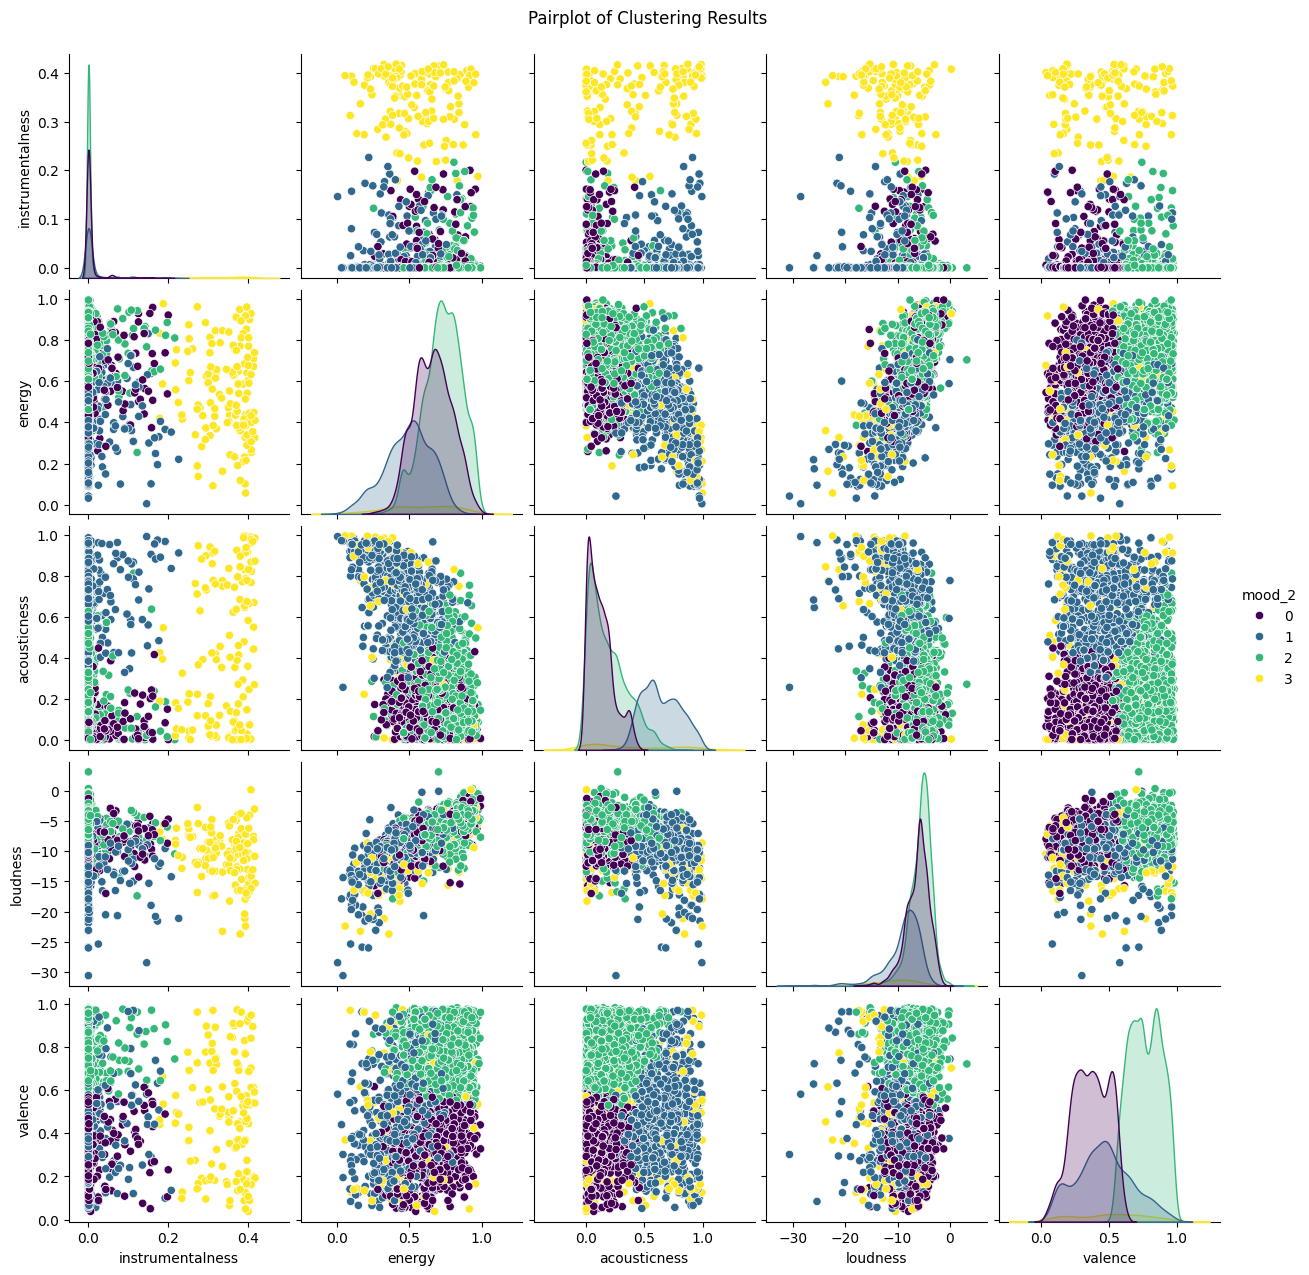

In [28]:
# Add the 'kmeans' column to the DataFrame if not already present
if 'mood_2' not in music_df.columns:
    music_df['mood_2'] = kmeans.labels_

# Pair plot to visualize all combinations of features
sns.pairplot(music_df, vars=col_features_2, hue='mood_2', palette='viridis')
plt.suptitle('Pairplot of Clustering Results', y=1.02)
plt.show()

- We can discriminate the group 3 very well with the feature 'instrumentalness'.
- Group 0 can be distinguished with the feature 'valence', which places it above approximately 0.5.
- Group 1 has values of 'acousticness' generally below 0.6 and 'loudness' values above -15 dB.
- Finally, group 2 presents 'energy' values tending to be low, and medium-high 'acousticness' values.

#### Option 3:

In [29]:
# Normalize features to the range [0, 1]
X = MinMaxScaler().fit_transform(music_df[selected_features])

# Perform clustering with KMeans
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                max_iter=1000,
                random_state=42).fit(X)

# Add cluster labels to the DataFrame
music_df['mood_3'] = kmeans.labels_

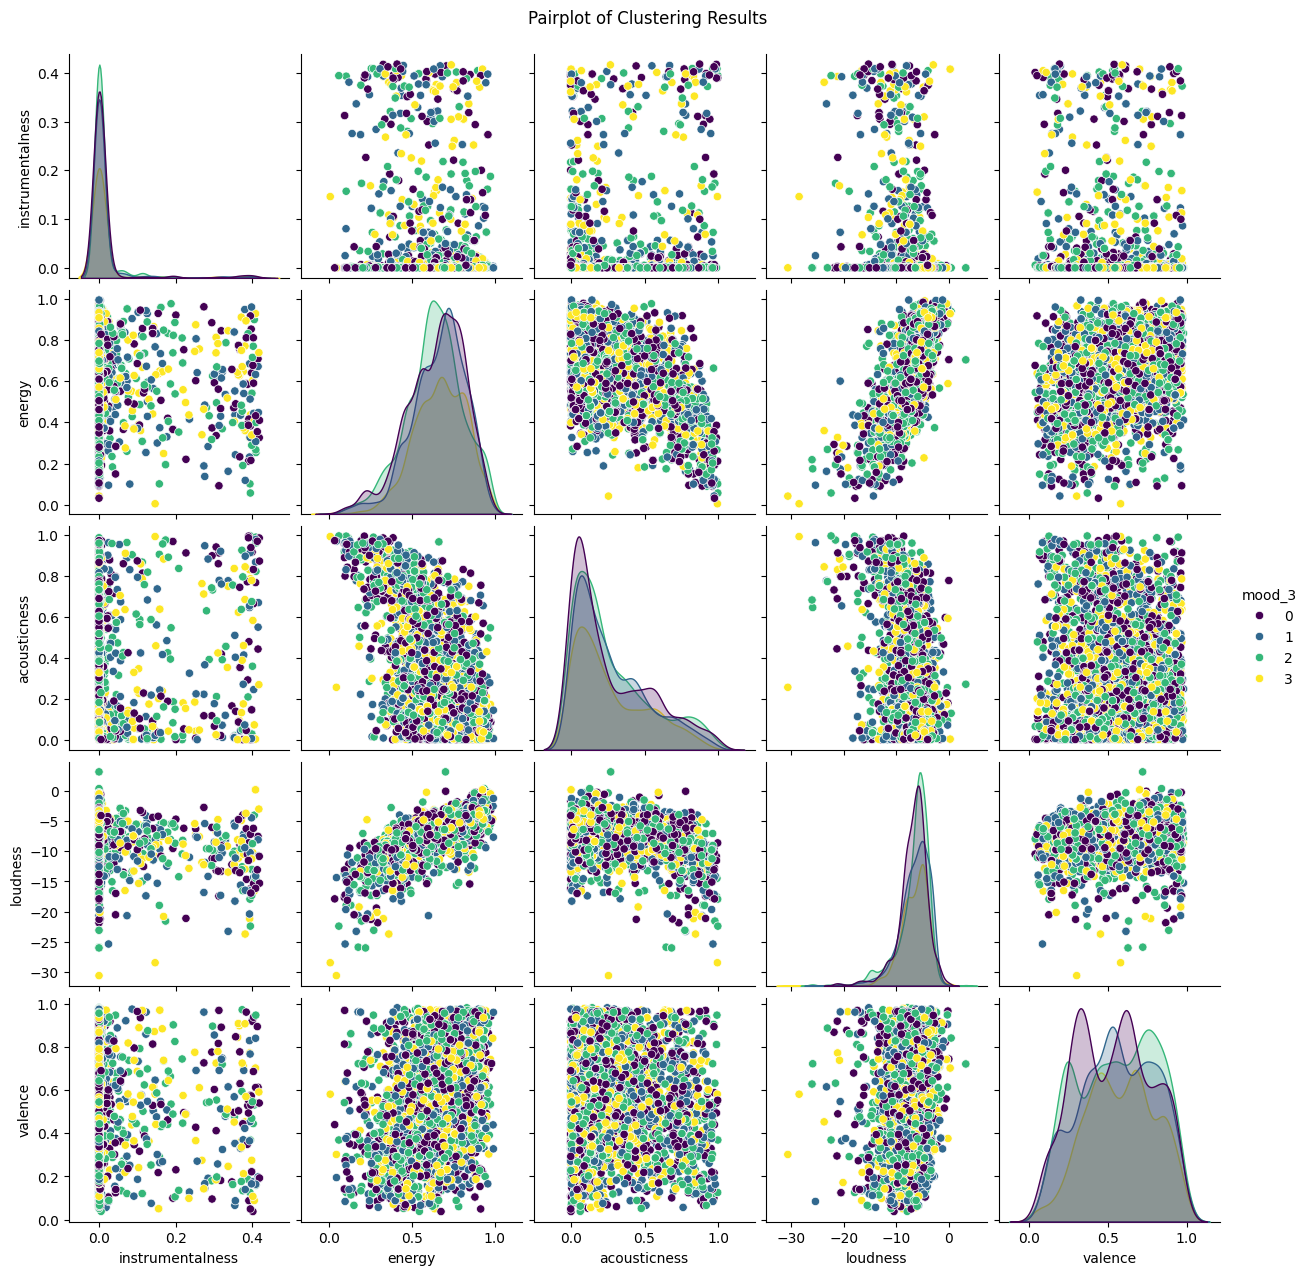

In [30]:
# Add the 'kmeans' column to the DataFrame if not already present
if 'mood_3' not in music_df.columns:
    music_df['mood_3'] = kmeans.labels_

# Pair plot to visualize all combinations of features
sns.pairplot(music_df, vars=col_features_2, hue='mood_3', palette='viridis')
plt.suptitle('Pairplot of Clustering Results', y=1.02)
plt.show()

#### Conclusions:

In [31]:
music_df["mood"].value_counts()

mood
3    2113
1    1943
0    1099
2     707
Name: count, dtype: int64

In [32]:
music_df["mood_2"].value_counts()

mood_2
2    2415
0    1991
1    1272
3     184
Name: count, dtype: int64

The number of data points in each cluster is quite similar.

In [33]:
mood_0_mean = music_df[music_df["mood"] == 0].describe().loc["mean"]
mood_1_mean = music_df[music_df["mood"] == 1].describe().loc["mean"]
mood_2_mean = music_df[music_df["mood"] == 2].describe().loc["mean"]
mood_3_mean = music_df[music_df["mood"] == 3].describe().loc["mean"]

mood_values = pd.DataFrame({"mood_3": mood_3_mean, "mood_0": mood_0_mean,"mood_2": mood_2_mean,  "mood_1": mood_1_mean})
mood_values

mood_3         mood_0         mood_2         mood_1
duration_ms       194359.978230  199079.421292  207147.524752  200777.372620
popularity            68.610980      62.435851      61.913720      74.065363
danceability           0.740441       0.723532       0.525993       0.642640
energy                 0.733478       0.640644       0.407095       0.652637
key                    5.728348       5.214741       5.257426       5.474524
loudness              -5.573050      -7.040325     -10.147388      -6.496409
mode                   0.547089       0.484076       0.653465       0.576428
speechiness            0.100180       0.119692       0.070695       0.095675
acousticness           0.122154       0.516096       0.716081       0.135979
instrumentalness       0.009500       0.014196       0.044623       0.015454
liveness               0.133905       0.134348       0.138984       0.143607
valence                0.749353       0.680180       0.362719       0.350225
tempo                124.092500     114.300571     120.227810     123.819687
time_signature         3.868434       3.947225       3.826025       3.926402
mood                   3.000000       0.000000       2.000000       1.000000
mood_2                 1.831519       1.472247       1.161245       0.177560
mood_3                 1.378609       1.438581       1.251768       1.368502

In [34]:
mood_2_0_mean = music_df[music_df["mood_2"] == 0].describe().loc["mean"]
mood_2_1_mean = music_df[music_df["mood_2"] == 1].describe().loc["mean"]
mood_2_2_mean = music_df[music_df["mood_2"] == 2].describe().loc["mean"]
mood_2_3_mean = music_df[music_df["mood_2"] == 3].describe().loc["mean"]

mood_2_values = pd.DataFrame({"mood_2_0": mood_2_0_mean, "mood_2_1": mood_2_1_mean, "mood_2_2": mood_2_2_mean, "mood_2_3": mood_2_3_mean})
mood_2_values

mood_2_0       mood_2_1       mood_2_2       mood_2_3
duration_ms       199675.478654  199973.121855  195132.302692  232991.592391
popularity            74.099448      65.276730      67.182609      46.000000
danceability           0.665261       0.613611       0.727768       0.639304
energy                 0.660654       0.492778       0.729400       0.576752
key                    5.412356       5.230346       5.699379       5.413043
loudness              -6.252463      -8.909242      -5.627047     -10.540054
mode                   0.559016       0.567610       0.556936       0.489130
speechiness            0.099789       0.091696       0.103290       0.077917
acousticness           0.125467       0.641691       0.190784       0.374987
instrumentalness       0.005967       0.010428       0.003655       0.343908
liveness               0.137429       0.134856       0.139344       0.142422
valence                0.367335       0.464081       0.767236       0.506966
tempo                122.303383     119.770648     122.545340     117.419554
time_signature         3.932195       3.900157       3.865424       3.918478
mood                   1.179809       1.080189       2.358592       1.505435
mood_2                 0.000000       1.000000       2.000000       3.000000
mood_3                 1.347062       1.341195       1.404555       1.402174

And the mean values of each subgroup are also very close.

For last case, mood_2:
- Calm, macthes with cluster 2
- Energetic, matches with cluster 0
- Happy with cluster 1
- Sad with cluster 3

***

In [36]:
mf=pd.read_csv("./data/music_verify.csv")

In [37]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        285 non-null    int64  
 1   artist            285 non-null    object 
 2   album             285 non-null    object 
 3   song_name         285 non-null    object 
 4   release_date      285 non-null    object 
 5   duration_ms       285 non-null    int64  
 6   popularity        285 non-null    int64  
 7   track_id          285 non-null    object 
 8   danceability      285 non-null    float64
 9   energy            285 non-null    float64
 10  key               285 non-null    int64  
 11  loudness          285 non-null    float64
 12  mode              285 non-null    int64  
 13  speechiness       285 non-null    float64
 14  acousticness      285 non-null    float64
 15  instrumentalness  285 non-null    float64
 16  liveness          285 non-null    float64
 1

In [38]:
mf.drop(columns=["Unnamed: 0","track_id"], inplace=True)

In [40]:
# log1p for instrumentalness
mf['instrumentalness'] = np.log1p(mf['instrumentalness'])

# Normalize features to the range [0, 1]
X = MinMaxScaler().fit_transform(mf[col_features_2])

# Perform clustering with KMeans
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                max_iter=1000,
                random_state=42).fit(X)

# Add cluster labels to the DataFrame
mf['mood'] = kmeans.labels_

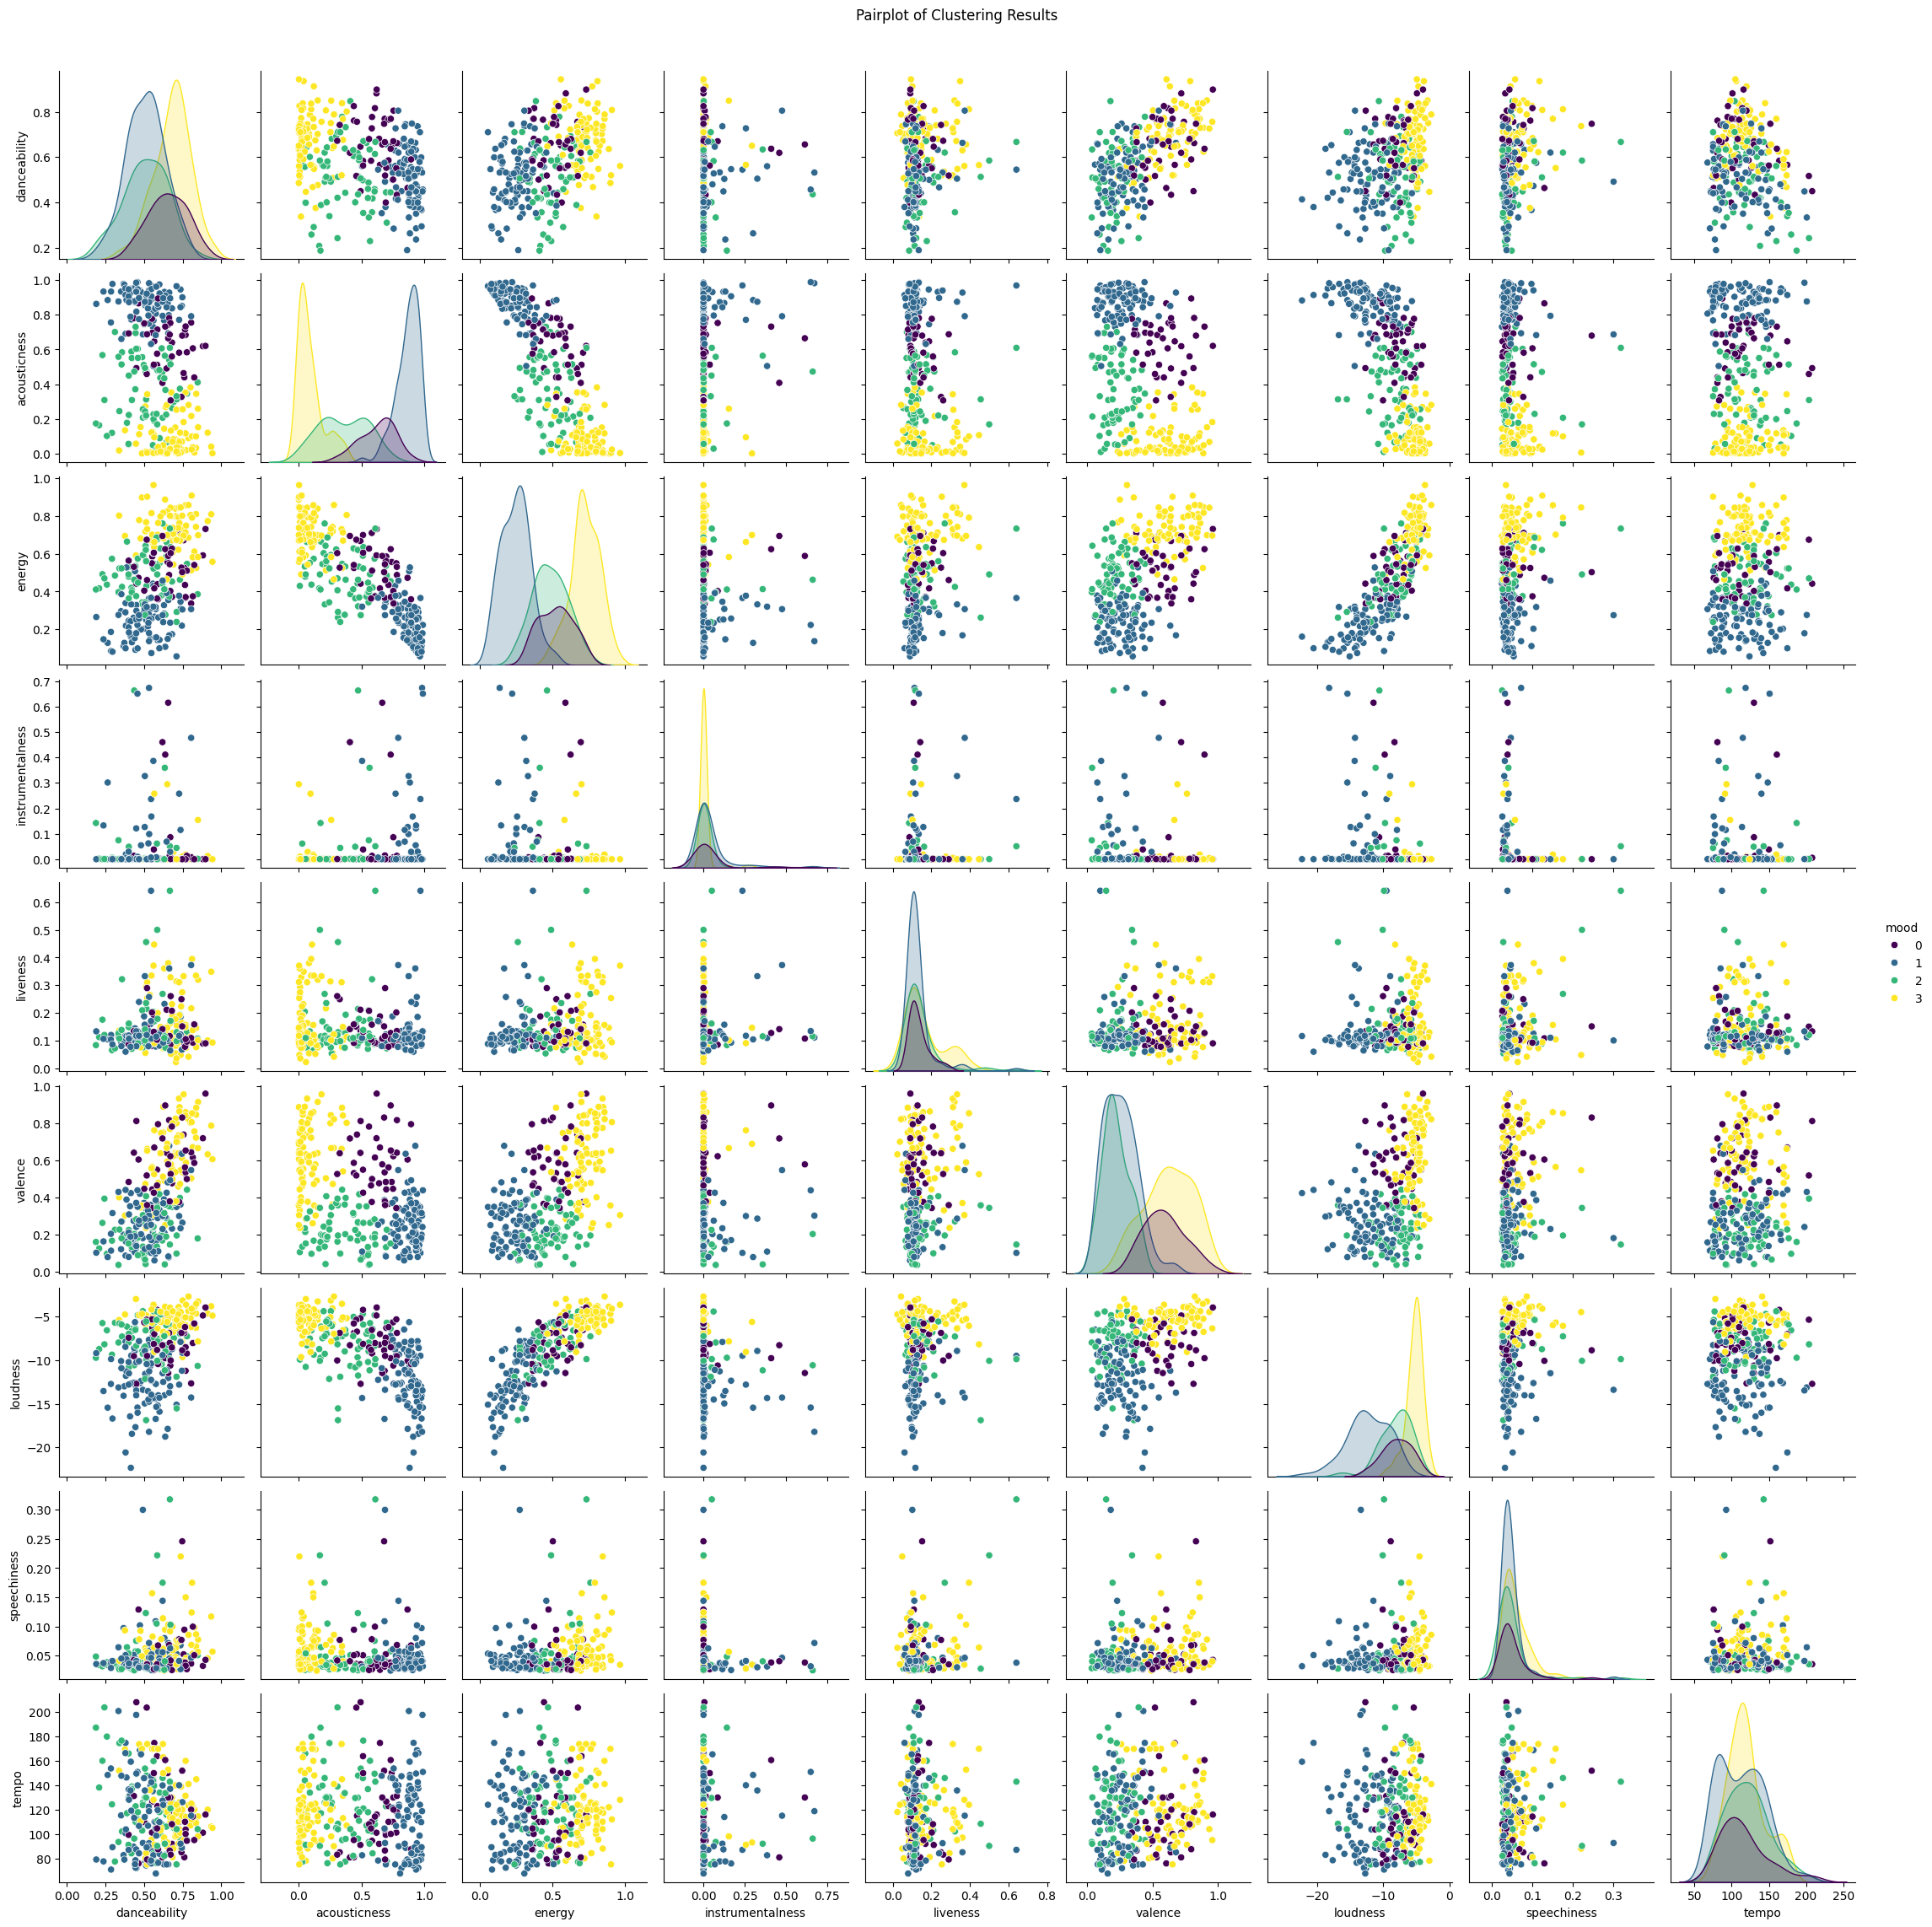

In [41]:
# Pairplot para visualizar todas las combinaciones de características
sns.pairplot(mf, vars=col_features, hue='mood', palette='viridis')
plt.suptitle('Pairplot of Clustering Results', y=1.02)
plt.show()

In [43]:
mood_0_mean = mf[mf["mood"] == 0].describe().loc["mean"]
mood_1_mean = mf[mf["mood"] == 1].describe().loc["mean"]
mood_2_mean = mf[mf["mood"] == 2].describe().loc["mean"]
mood_3_mean = mf[mf["mood"] == 3].describe().loc["mean"]

mood_values = pd.DataFrame({"mood_0": mood_0_mean, "mood_1": mood_1_mean, "mood_2": mood_2_mean, "mood_3": mood_3_mean})
mood_values

mood_0         mood_1         mood_2         mood_3
duration_ms       203773.475000  228403.957447  228041.253731  193360.976190
popularity            68.500000      66.542553      72.000000      73.250000
danceability           0.653525       0.510053       0.509612       0.680929
energy                 0.523600       0.247429       0.484045       0.725060
key                    5.275000       4.914894       4.791045       5.535714
loudness              -7.954850     -12.287766      -8.104358      -5.278952
mode                   0.825000       0.691489       0.671642       0.583333
speechiness            0.050647       0.046344       0.049325       0.060182
acousticness           0.626900       0.866660       0.357700       0.091858
instrumentalness       0.041785       0.046737       0.021963       0.009488
liveness               0.134748       0.127796       0.143016       0.164321
valence                0.592900       0.255243       0.219252       0.619821
tempo                116.643300     113.278851     121.360284     119.624393
duration_ms.1     203773.950000  228404.212766  228041.626866  193354.607143
time_signature         3.900000       3.829787       3.910448       3.976190
mood                   0.000000       1.000000       2.000000       3.000000

For last case, mood:
- Calm, macthes with cluster 1
- Energetic, matches with cluster 3
- Happy with cluster 0
- Sad with cluster 2